In [3]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
colnames=['day', 'time', 'tide']
df = pd.read_fwf(r'ASTR19_S22_group_project_data.txt', header=None, skiprows=(0,1,2), names=colnames)
#Imports the data from the file

npoints = 82
x = np.linspace(0.5, 41, npoints)
#Sets up the X Axis

y = df['tide']
#Sets up the Y values

y_err = np.full(82,.25)
#Sets up the errorbars

def f_line(x, a, b, c, d, e, f):
    return a*np.sin(b*x + c)*np.sin(d*x + e) + f
#Sets up our curve optimization

params, params_cov = optimize.curve_fit(f_line,x,y,p0=[4,np.pi/15,np.pi/2,2*np.pi,1.0,2.0])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
#Optimize the curve

y_fit = a_fit*np.sin(b_fit*x + c_fit)*np.sin(d_fit*x + e_fit) + f_fit
#Sets up our optimised curve to be plotted

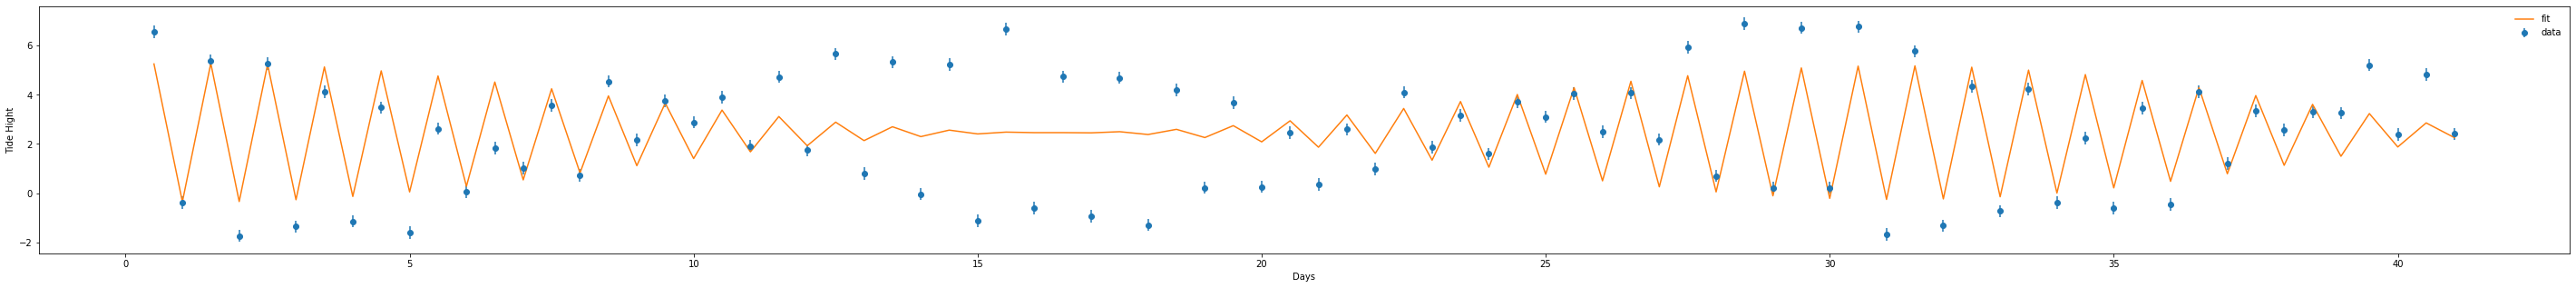

In [5]:
f = plt.figure(figsize=(50,5))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
#Plot our data and our optimized curve

plt.xlabel('Days')
plt.ylabel('Tide Hight')
#Label our Axis

plt.legend(loc=0,frameon=False)
#Add a Legend

plt.savefig("Ocean_Tide_Fitting.pdf")
#Save as a pdf


In [6]:
ydata = df['tide'].tolist()
yfitdata = y_fit.tolist()

In [7]:
residual = []
for i in range(82):
    res = (ydata[i]-y_fit[i])
    if res > 0:
        residual.append(res-.25)
    elif res < 0:
        residual.append(res+.25)
    else:
        residual.append(res)
#Set up the residuals

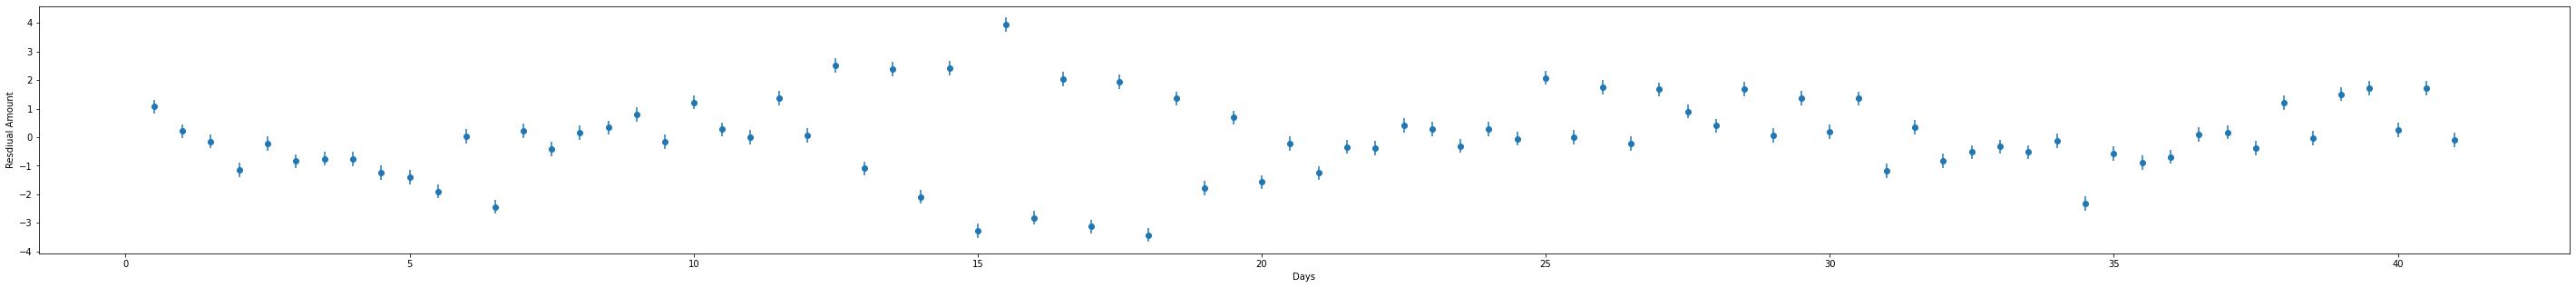

In [8]:
f = plt.figure(figsize=(50,5))
plt.errorbar(x,residual,yerr=y_err,fmt='o')
plt.xlabel("Days")
plt.ylabel("Resdiual Amount")
plt.show()
#Plot the residuals

The standard deviation is 1.3833743931229725
The scatter in the data is greater than the assumed experimental error


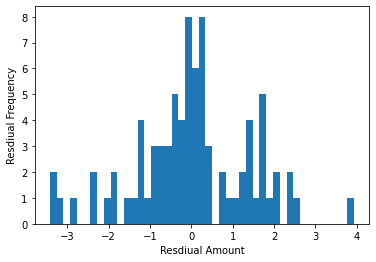

In [9]:
plt.hist(residual, bins=45)
plt.xlabel("Resdiual Amount")
plt.ylabel("Resdiual Frequency")
plt.savefig("Histogram_of_Residuals.pdf")
print(f"The standard deviation is {np.std(residual)}")
#Histogram the residuals

if np.std(residual) < 0.25:
    print("The assumed experimental error is greater than the scatter in the data")
if np.std(residual) == 0.25:
    print("The assumed experimental error is equal to the scatter in the data")
if np.std(residual) > 0.25:
    print("The scatter in the data is greater than the assumed experimental error")
#Determine scatter in the data vs. assumed experimental error


In [10]:
Tsunami = 2.0/np.std(residual)
print(f"the Tsunami is {Tsunami} Standard deviations away from the normal tides in the model.")
#Determine how much of an oultier the Tsunami is.

the Tsunami is 1.445740220393261 Standard deviations away from the normal tides in the model.


In [11]:
residual_T = np.append([1.065712808363493, 0.21007111001931744, -0.1476131440374049, -1.149337756503715, -0.22596601884749035, -0.842413561677166, -0.7525757472181667, -0.7647109067482005, -1.243057489937795, -1.4095023682329602, -1.895182221531143, 0.021947350217640327, -2.4385606144176677, 0.22002653400343308, -0.4242529748424073, 0.15635515642767994, 0.3356790365632203, 0.8033141523234193, -0.1513391800457109, 1.2235442509103356, 0.272113689753136, -0.010565420779534263, 1.3639636454379738, 0.06262165937436381, 2.5231295424889755, -1.0964809966131592, 2.379970977456951, -2.089103725048117, 2.416677825988924, -3.2784750114329904, 3.9375857257535243, -2.820094966988439, 2.0294047826745265, -3.131916953213349, 1.9413522782894352, -3.424430030920886, 1.3551840273014832, -1.790638909524068, 0.6851231213967868, -1.5759422057134131, -0.22231106663699984, -1.2579139214124648, -0.3385667223738249, -0.3759969536685459, 0.4065943673458654, 0.2788790034256632, -0.3053174767877733, 0.29473975561299404, -0.05198565858768145, 2.0790512672302905, -0.0007858931037585393, 1.7392271363552285, -0.2292974407338919, 1.6731384203818607, 0.9041936290618882, 0.3996052507977772, 1.6802194413394789, 0.06885040971309264, 1.377702744170115, 0.18289657393393388, 1.3535940079713455, -1.174108796744828, 0.342587834481499, -0.8356540333925098, -0.5230698831588221, -0.33271895487374215, -0.5236762664466941, -0.13373151381566617, -2.3320634134160603, -0.5746271476694355, -0.8834883322904963, -0.689008450205377, 0.0845747237777088, 0.17160126580503965, -0.3772688433128719, 1.1974207293430876, -0.03995980374350827, 1.510003383491108, 1.7244512688069475, 0.2617763832107136, 1.7232849768303975, -0.09445550372941547],[2])

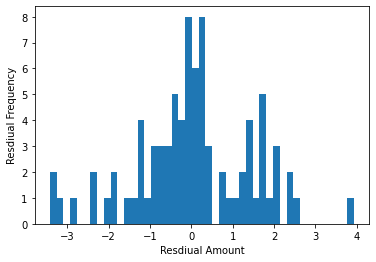

In [10]:
plt.hist(residual_T, bins=45)
plt.xlabel("Resdiual Amount")
plt.ylabel("Resdiual Frequency")
plt.savefig("Histogram_of_Residuals_with_Tsunami.pdf")
#Histogram the residuals with the Tsunami